# SI 370 - Machine Learning I: Clustering

### Q1: Record your music preferences

Fill in your music preferences on https://docs.google.com/spreadsheets/d/1KY8tBiiSeehMDxXc4GU_mOoD8MRnUVkUtinadNJEgrU/edit?usp=sharing

Values should range from 1 to 10.  1=no way; 10=the best.  Please fill in a value for each column.

We will be downloading the completed sheet to use as data for this class.


## Machine Learning
* statistical models based on patterns and inference
* no need or desire to understand underlying mechanisms
* it's about getting the "right" answer
* the computer uses algorithms to "learn" about the data
* subset of artificial intelligence
* typically requires large amount of input data

## Unsupervised vs. Supervised Machine Learning
* unsupervised: 
 * when you only have input data and want to find structure
 * when your observations lack labels
 * clustering (today)
* supervised: 
 * when you have input and output and want to predict correct labeling of unknowns
 * when your observations have labels
 * classification (next class)

unsupervised 
- when you don't know what the answer is, no right or wrong answer
- ex: clustering

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide02.png)

![](resources/clustering/Slide03.png)

![](resources/clustering/Slide01.png)

![](resources/clustering/Slide04.png)

![](resources/clustering/Slide07.png)

![](resources/clustering/Slide09.png)

![](resources/clustering/Slide10.png)

![](resources/clustering/Slide11.png)

![](resources/clustering/Slide12.png)

![](resources/clustering/Slide13.png)

![](resources/clustering/Slide14.png)

![](resources/clustering/Slide15.png)

![](resources/clustering/Slide16.png)

![](resources/clustering/Slide17.png)

![](resources/clustering/Slide18.png)

![](resources/clustering/Slide19.png)

![](resources/clustering/Slide20.png)

![](resources/clustering/Slide21.png)

![](resources/clustering/Slide22.png)

![](resources/clustering/Slide23.png)

![](resources/clustering/Slide24.png)

![](resources/clustering/Slide25.png)

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import pandas as pd
import seaborn as sns

In [3]:
music = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSb23GQT6cvFueM0yWDZ6YAFjVlLKUb_7fdMHsmQb6x84iXC3bCWgzXjnxLr15gniYY-oOPjOn0dv0o/pub?gid=0&single=true&output=csv')

In [4]:
music.head()

,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,Chris,5.0,9.0,3.0,2.0,6.0,1.0,8.0,4.0,5.0,9.0,3.0
1,Luke,4.0,7.0,1.0,9.0,6.0,5.0,5.0,5.0,5.0,2.0,3.0
2,Evan H.,5.0,6.0,3.0,5.0,4.0,7.0,4.0,4.0,5.0,9.0,4.0
3,Kai,4.0,3.0,1.0,8.0,2.0,10.0,3.0,9.0,6.0,5.0,7.0
4,George,4.0,6.0,1.0,4.0,2.0,9.0,2.0,6.0,6.0,6.0,9.0


In [5]:
music = music.dropna() # Clustering doesn't like NaNs
music_names = music['Name']
music_nonames = music.drop('Name',axis=1)

In [6]:
music_names.head()

0      Chris
1       Luke
2    Evan H.
3        Kai
4    George 
Name: Name, dtype: object

In [7]:
music_nonames.head()

,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,5.0,9.0,3.0,2.0,6.0,1.0,8.0,4.0,5.0,9.0,3.0
1,4.0,7.0,1.0,9.0,6.0,5.0,5.0,5.0,5.0,2.0,3.0
2,5.0,6.0,3.0,5.0,4.0,7.0,4.0,4.0,5.0,9.0,4.0
3,4.0,3.0,1.0,8.0,2.0,10.0,3.0,9.0,6.0,5.0,7.0
4,4.0,6.0,1.0,4.0,2.0,9.0,2.0,6.0,6.0,6.0,9.0


In [8]:
model = AgglomerativeClustering(n_clusters=3) # we can make up the value for clusters
model.fit_predict(music_nonames)

array([1, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2])

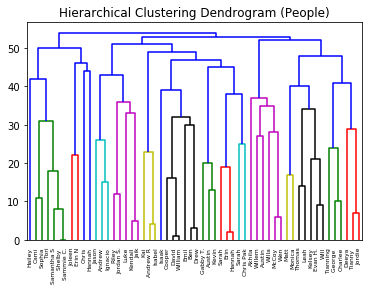

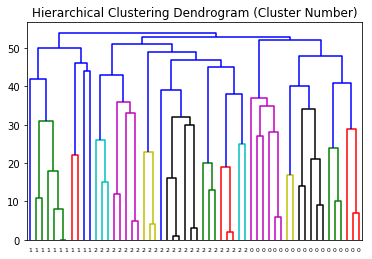

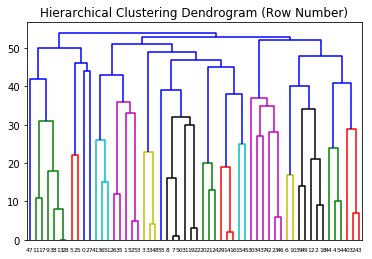

In [9]:
# Authors: Mathew Kallada & Chris Teplovs
# License: BSD 3 clause
"""
=========================================
Plot Hierarachical Clustering Dendrogram 
=========================================
This example plots the corresponding dendrogram of a hierarchical clustering
using AgglomerativeClustering and the dendrogram method available in scipy.
"""

import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


model = AgglomerativeClustering(n_clusters=3)
model = model.fit(music_nonames)

plt.title('Hierarchical Clustering Dendrogram (People)')

plot_dendrogram(model,labels=music_names.values)
plt.xticks(rotation=90)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Cluster Number)')
plot_dendrogram(model,labels=model.labels_)
plt.xticks(rotation=0)
plt.show()

plt.title('Hierarchical Clustering Dendrogram (Row Number)')
plot_dendrogram(model)
plt.xticks(rotation=0)
plt.show()

### Q2: What's the "best" choice for the number of clusters?  What are your options? How would you choose? 

There are 57 clusters, each with one person in it. You could narrow this all the way down to 2. I would pick 11, because this is the number of categories. JUST KIDDING IT'S CLUSTERS NOT CATEGORIES!!!!!! IF IT WERE JUST CATEGORIES WE WOULDN'T HAVE A WAY TO LOOK AT DISTANCES.

It's all arbitrary, just pick one.

![](resources/clustering/Slide26.png)

![](resources/clustering/Slide27.png)

![](resources/clustering/Slide28.png)

![](resources/clustering/Slide31.png)

![](resources/clustering/Slide32.png)

![](resources/clustering/Slide33.png)

![](resources/clustering/Slide34.png)

![](resources/clustering/Slide36.png)

![](resources/clustering/Slide37.png)

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
kmeans = KMeans(n_clusters=3) # start with 2 clusters
kmeans.fit(music_nonames)
print("Labels:")
print(kmeans.labels_)


Labels:
[2 2 2 1 2 0 2 1 0 0 2 0 2 0 1 1 0 0 2 0 0 0 0 2 1 0 0 0 0 1 2 1 1 1 2 1 1
 2 0 2 1 1 2 1 1 1 2 0 1 2 2 0 0 0 2 1]


And now let's join the labels with the original dataframe:

In [12]:
pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

,0,Name,Blues,Classical,Country,Electronic,Folk,Hip Hop,Jazz,Latin,Pop,Rock,Soul-R-and-B
0,2,Chris,5.0,9.0,3.0,2.0,6.0,1.0,8.0,4.0,5.0,9.0,3.0
1,2,Luke,4.0,7.0,1.0,9.0,6.0,5.0,5.0,5.0,5.0,2.0,3.0
2,2,Evan H.,5.0,6.0,3.0,5.0,4.0,7.0,4.0,4.0,5.0,9.0,4.0
3,1,Kai,4.0,3.0,1.0,8.0,2.0,10.0,3.0,9.0,6.0,5.0,7.0
4,2,George,4.0,6.0,1.0,4.0,2.0,9.0,2.0,6.0,6.0,6.0,9.0
5,0,Joleen,1.0,1.0,1.0,6.0,1.0,3.0,1.0,1.0,2.0,9.0,2.0
6,2,Matt,8.0,1.0,1.0,3.0,2.0,10.0,4.0,6.0,5.0,9.0,7.0
7,1,David,3.0,2.0,4.0,7.0,1.0,7.0,5.0,4.0,7.0,8.0,8.0
8,0,Cooper,3.0,2.0,7.0,5.0,1.0,6.0,4.0,3.0,8.0,10.0,6.0
9,0,Tori,1.0,4.0,7.0,1.0,2.0,10.0,5.0,2.0,8.0,8.0,8.0


## There are a number of different evaluation metrics available, but one of the most common is called the "silhouette score", which range between -1 and 1.  Higher values indicate a better model.

In [13]:
from sklearn import metrics

In [14]:
metrics.silhouette_score(music_nonames,kmeans.labels_)

0.1142373190846668

### Q3: Repeat the k-means clustering with 3,4,5...n clusters. 
Which of these is best based on the silhouette scores?  Can you create a plot of silhouette scores vs. k?

NOTE: We'll return to visualization of k-means after we talk about dimension reduction.

In [22]:
for k in range(3, 10):
    print("k = " + str(k))
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(music_nonames)
#     print("Labels:")
#     print(kmeans.labels_)

    pd.concat([pd.DataFrame(kmeans.labels_).reset_index(),music.reset_index()],axis=1).drop('index',axis=1)

    print(metrics.silhouette_score(music_nonames,kmeans.labels_))

k = 3
0.11941118641503137
k = 4
0.12074273069531236
k = 5
0.11548961678750791
k = 6
0.11451496305298044
k = 7
0.13518835722089406
k = 8
0.1349037662001724
k = 9
0.14462131828334931


We want the largest silhouette score, so here that's when k = 9.